In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
wine = load_wine()
X = pd.DataFrame(data=wine.data,columns=wine.feature_names)
Y = pd.DataFrame(data=wine.target,columns=['target'])
df = pd.concat([X,Y],axis=1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
data = df[['proline','od280/od315_of_diluted_wines','target']]
data

,proline,od280/od315_of_diluted_wines,target
0,1065.0,3.92,0
1,1050.0,3.40,0
2,1185.0,3.17,0
3,1480.0,3.45,0
4,735.0,2.93,0
...,...,...,...
173,740.0,1.74,2
174,750.0,1.56,2
175,835.0,1.56,2
176,840.0,1.62,2


In [7]:
X = data[['proline','od280/od315_of_diluted_wines']]
Y = data['target']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(y_train)

158    2
137    2
98     1
159    2
38     0
      ..
71     1
106    1
14     0
92     1
102    1
Name: target, Length: 142, dtype: int64


In [13]:
model = KNeighborsClassifier(3)

model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [14]:
accuracy = accuracy_score(prediction, y_test)
print(accuracy)

0.7222222222222222


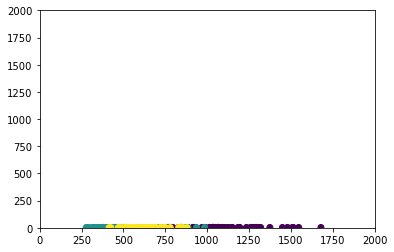

In [23]:
plt.scatter(data['proline'],data['od280/od315_of_diluted_wines'],c=data['target'].values.ravel())
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.show()


In [19]:
scaled_data = data.copy()
min_proline = scaled_data['proline'].min()
max_proline = scaled_data['proline'].max()
min_conc = scaled_data['od280/od315_of_diluted_wines'].min()
max_conc = scaled_data['od280/od315_of_diluted_wines'].max()
scaled_data['proline'] = (scaled_data['proline']-min_proline)/(max_proline - min_proline)
scaled_data['od280/od315_of_diluted_wines'] = (scaled_data['od280/od315_of_diluted_wines']
                                               -min_conc)/(max_conc-min_conc)

In [20]:
scaled_data

,proline,od280/od315_of_diluted_wines,target
0,0.561341,0.970696,0
1,0.550642,0.780220,0
2,0.646933,0.695971,0
3,0.857347,0.798535,0
4,0.325963,0.608059,0
...,...,...,...
173,0.329529,0.172161,2
174,0.336662,0.106227,2
175,0.397290,0.106227,2
176,0.400856,0.128205,2


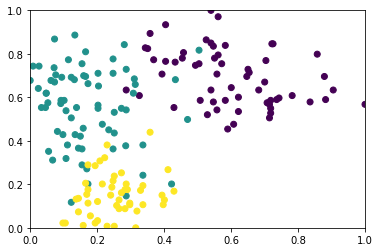

In [22]:
plt.scatter(scaled_data['proline'],scaled_data['od280/od315_of_diluted_wines'],c=scaled_data['target'].values.ravel())
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [26]:
X = scaled_data[['proline','od280/od315_of_diluted_wines']]
Y = scaled_data['target']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

model = KNeighborsClassifier(1)

model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy = accuracy_score(prediction, y_test)
print(accuracy)

0.9166666666666666


In [28]:
# standard scale -> standard normal distribution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data[['proline','od280/od315_of_diluted_wines']])
standard_scaled_data = scaler.transform(data[['proline','od280/od315_of_diluted_wines']])
standard_scaled_data = pd.DataFrame(standard_scaled_data,columns=['proline','od280/od315_of_diluted_wines'])
standard_scaled_data

,proline,od280/od315_of_diluted_wines
0,1.013009,1.847920
1,0.965242,1.113449
2,1.395148,0.788587
3,2.334574,1.184071
4,-0.037874,0.449601
...,...,...
173,-0.021952,-1.231206
174,0.009893,-1.485445
175,0.280575,-1.485445
176,0.296498,-1.400699


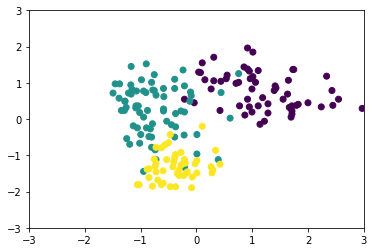

In [30]:
plt.scatter(standard_scaled_data['proline'],standard_scaled_data['od280/od315_of_diluted_wines'],c=scaled_data['target'].values.ravel())
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

In [ ]:
# MinMaxScaler
# Standard Scaler